# Boosting

----

Boosting은 약한 학습기(weak learner)들을 결합하여 강한 학습기(strong learner)를 만드는 ensemble 방법론 중 하나이다.

Boosting은 처음에는 각각의 데이터 포인트에 대해 동일한 가중치를 부여한 상태에서 학습을 시작한다. 

 * 즉, 일반적인 머신 러닝 방법을 적용한다.

이후, 이전에 학습된 모델이 잘못 예측한 데이터에 대해 더 높은 가중치를 부여하여, 다시 새로운 모델을 학습한다.

* 이전 학습기의 오분류된 샘플에 주목하고, 다음 학습기가 이를 보완하여 전체 모델의 성능을 향상하고자 하는 것

* 오분류에 주목하기 위해 개별 학습기는 약한 학습기를 사용

이를 반복하여 여러 개의 약한 학습기를 결합하는 방식을 취한다.

각각의 약한 학습기들이 궁극적으로 합쳐서 높은 성능을 보인다.

부스팅 (boosting)은 bagging과 마찬가지로 트리 모델만이 아닌 다른 일반적인 통계적 학습에도 적용할 수 있다.

## Adaboost

------

에이다부스트 (adaboost)는 adaptive boosting의 줄임말로 인기있는 부스팅 방법 중 하나이다.

트리뿐만 아니라 다른 예측기들을 통해서도 adaboost를 적용할 수 있다.

여러 약한 학습기, 예를 들어 분기가 하나인 트리를 순차적으로 학습하여 합함으로 강한 학습기를 만든다.

분류기의 경우 다음과 같은 방식으로 adaboost는 작동한다.

* 첫 번째 분류기를 훈련세트에서 훈련시키고 예측한다. <br><br>

* 잘못 분류된 샘플의 가중치를 높인다. <br><br>

* 두 번째 분류기는 업데이트된 가중치를 지닌 샘플을 사용하여 훈련하고 다시 예측한다. <br><br>

* 또다시 잘못 분류된 샘플의 가중치를 업데이트한다. <br><br>

<img src="https://jinsu-l.github.io/assets/post_images/image-20191217222322387.png" width="800">

### 훈련

자세한 훈련 메카니즘은 구현된 알고리즘에 따라 조금씩 다르다. 아래에 소개된 내용은 기본적인 형태의 AdaBoost에 대한 것이다.

<p> <font color=#00008B> &#9635 샘플의 가중치 </font></p>

보다 자세히 살펴보면, $i$-번째 샘플의 가중치 $w^{(i)}$는 초기에는 $\frac{1}{m}$으로 초기화한다. 여기서 $m$은 데이터의 수.

첫 번째 예측기가 학습되고, 가중치가 적용된 에러율 $r_1$을 계산한다.

각 차례 $j$에서 가중치 적용 에러율은 다음과 같다.

$$ r_j = \frac{\sum^{m}_{i=1, \hat y_j^{(i)} \neq y^{(i)}} w^{(i)}}{ \sum_{i=1}^{m}w^{(i)}}  = \sum^{m}_{i=1, \hat y_j^{(i)} \neq y^{(i)}} w^{(i)}$$

* 분자는 $j$ 예측기가 잘못 분류한 샘플들의 가중치 비율을 나타낸다. <br><br>

* $r_j$가 0에 가까울수록 좋은 예측기 <br><br>

* 분모는 합계 1이 됨. <br><br>

<p> <font color=#00008B> &#9635 학습기의 가중치 </font></p>

알고리즘에 따라 학습기에도 가중치가 적용되는 경우도 있다.

각 $j$번째 학습기(learner)에 부여되는 가중치 $\alpha_j$는 다음과 같다.

$$ \alpha_j = \eta \log \frac{1 - r_j}{r_j} $$

* $r_j$가 0에 가까울수록, 즉, 예측기가 정확할수록 $\alpha_j$의 값이 크다. <br><br>

* 예측기가 부정확하다면 $\alpha_j$의 값은 0보다 작을 수도 있다. <br><br>

* 여기서 $\eta$는 학습률 하이퍼파라미터로 기본값은 1이다. <br><br>

<p> <font color=#00008B> &#9635 업데이트 </font></p>

그 다음 샘플의 가중치를 다음을 이용하여 업데이트한다.

$$
w^{(i)}  \leftarrow 
\left\{\begin{array}{ll}
w^{(i)}, & \text{if }  \hat y_j^{(i)} = y^{(i)} \text{ (분류 성공) }\\
w^{(i)} \exp(\alpha_j) , & \text{if }  \hat y_j^{(i)} \neq y^{(i)}  \text{ (분류 실패) }
\end{array}\right.
$$

* 업데이트 된 샘플의 가중치는 다시 $ \sum_{i=1}^{m} w^{(i)}$로 나누어 정규화한다. <br><br>

* 좋은 분류기가 예측에 실패했을 때, 실패한 샘플의 가중치가 더 크게 업데이트 된다. <br><br>


이 과정을 반복하여 ($j$를 1부터 증가시키며), 훈련을 마친다. 

보통은 지정된 예측기의 총 수에 도달하거나, 완벽한 예측기가 완성되면 중지한다.

### 예측

훈련이 완료된 booster에 새로운 $X$값을 대입하면 booster 내의 각 예측기들이 해당 $X$에 대한 $y$를 예측하여 클래스를 반환할 것이다.

* 이는 예측기 별로 같은 클래스를 예측할 수도 있고 다른 클래스로 예측할 수도 있다.

* 일반적인 상황이라면 다수결로 클래스를 정하면 된다.

그런데, 각 예측기들의 가중치 (중요도)가 다르므로 이를 감안하여 예측 결과를 종합한다.

예측을 할 때는 가중치 $\alpha_j$들의 합을 최대화 하는 클래스가 예측 결과가 된다.

$$ \hat y (x) = \arg\max_{k} \sum_{j=1, \hat y_j (x) = k}^{N} \alpha_j $$

즉, 다수결 투표와 비슷하지만 분류기의 성능에 따라 투표 가중치 $\alpha_j$를 달리준다. ($\alpha_j =1$이면 일인 일투표권과 같음)

#### [`sklearn.ensemble.AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)

Scikit-learn에서 구현된 Adaboost.

Scikit-learn에서는 SAMME과 SAMME.R라는 조금 변형된 알고리즘을 사용하며, 다중 클래스 문제에서도 사용할 수 있다.

SAMME에서 예측기 가중치를 구하는 식은

$$ \alpha_j = \eta  \left( \log \frac{1 - r_j}{r_j} + \log (K-1) \right) $$

이다. 

SAMME.R은 예측기가 클래스의 확률을 추정할 수 있을 때 사용되며, 좋은 성능을 가진다고 알려져 있다.

### 예제

아래 예제에서 weak classifier로 `DecisionTreeClassifier(max_depth=1)`를 이용하였다. 

* depth=1인 트리는 stump라고도 불리움.

데이터는 이전 단원에서 살펴본 ```make_moons```를 활용한다.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=400,
    algorithm="SAMME", learning_rate=1, random_state=42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=400, random_state=42)

<Figure size 500x400 with 0 Axes>

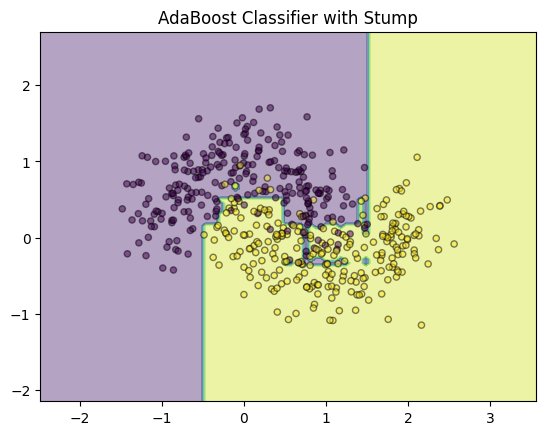

In [3]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(5,4))
DecisionBoundaryDisplay.from_estimator(
    ada_clf, X, alpha=0.4, response_method="predict"
)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 20, edgecolor="k", alpha=0.5)
plt.title("AdaBoost Classifier with Stump")
plt.show()

In [4]:
from sklearn.metrics import accuracy_score
y_pred_ada = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ada))

0.936


In [5]:
ada_clf.estimators_[0]

DecisionTreeClassifier(max_depth=1, random_state=1608637542)

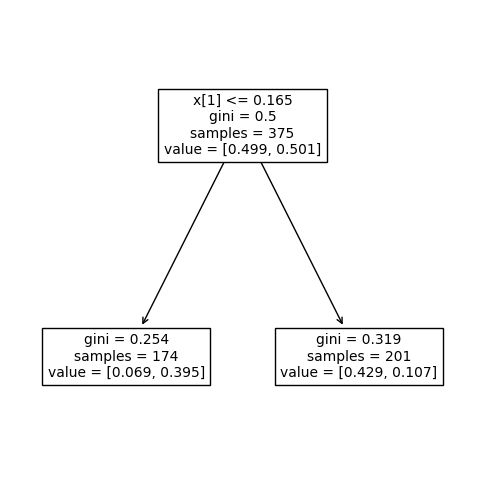

In [6]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(6,6))
plot_tree(ada_clf.estimators_[0], fontsize=10)
plt.show()

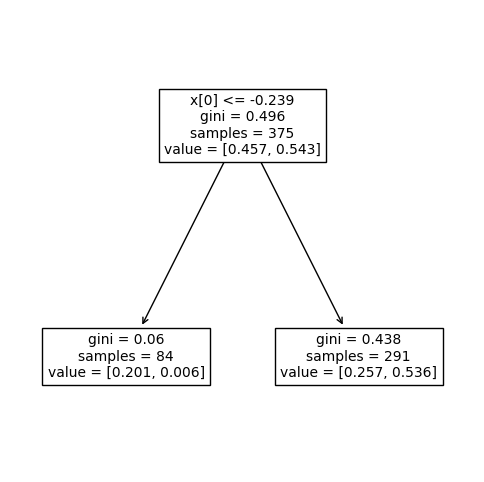

In [7]:
plt.figure(figsize=(6,6))
plot_tree(ada_clf.estimators_[1], fontsize=10)
plt.show()

SAMME 알고리즘을 사용하였을 경우 `.estimator_weights_` 속성을 통해 각 예측기의 가중치들을 살펴볼 수 있다.

반면 SAMME.R 알고리즘의 경우 각 예측기의 가중치는 동일하다.

### Another example : The elements of statistical learning

[`datasets.make_hastie_10_2`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html)는 2개의 클래스와 10개의 특성을 가진 총 12000개의 데이터 포인트를 생성한다.

분류 알고리즘의 성능을 평가하기 위한 벤치마크 데이터셋으로 사용된다.

In [8]:
from sklearn import datasets

X, y = datasets.make_hastie_10_2(n_samples=12_000, random_state=1)

X

array([[ 1.62434536, -0.61175641, -0.52817175, ..., -0.7612069 ,
         0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , ..., -0.87785842,
         0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072, ..., -0.93576943,
        -0.26788808,  0.53035547],
       ...,
       [-0.93116013, -1.66204029,  0.30451552, ..., -0.13420095,
         0.29183149, -0.43300684],
       [-1.3787448 ,  0.83384136, -1.53900483, ...,  0.89981334,
        -1.44271785,  2.51028547],
       [ 0.82776805,  2.04855517,  2.77822335, ...,  0.12579842,
        -0.1916412 ,  0.67553921]])

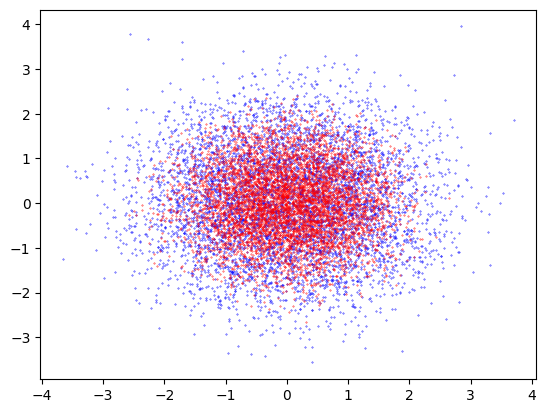

In [9]:
plt.scatter(X[y==1, 0], X[y==1, 1], color = "blue", s = 0.1)
plt.scatter(X[y==-1, 0], X[y==-1, 1], color = "red", s = 0.1)
plt.show()

In [10]:
n_estimators = 400
learning_rate = 1.0

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=2_000, shuffle=False
)

ada_real = AdaBoostClassifier(
    estimator= DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R",
)

ada_real.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=400)

[`staged_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier.staged_predict) : 각 boosting 반복 후에 앙상블 예측을 계산하여 반환

[`zero_one_loss`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html) : 잘못된 분류의 비율을 반환

In [11]:
import numpy as np
from sklearn.metrics import zero_one_loss

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

트리 및 random forest 방법과 비교

In [12]:
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)
tree_err = 1- tree_clf.score(X_test, y_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 400)
rf.fit(X_train, y_train)
rf_err = 1 - rf.score(X_test, y_test)

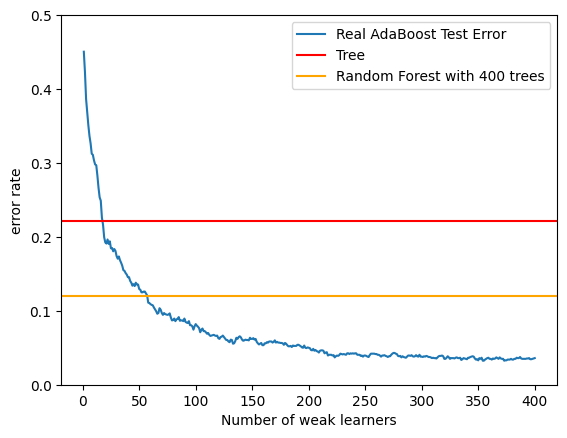

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err,
    label="Real AdaBoost Test Error")

ax.axhline(y = tree_err, color = 'red', linestyle = '-', label='Tree')
ax.axhline(y = rf_err, color = 'orange', linestyle = '-', label='Random Forest with 400 trees')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel("Number of weak learners")
ax.set_ylabel("error rate")

plt.legend()

plt.show()

## Gradient boosting

-------

또하나의 인기있는 부스팅은 gradient boosting이다.

Gradient boosting 또한 여러 개의 약한 예측 모델(weak learner)을 조합하여 강한 예측 모델(strong learner)을 만드는 앙상블 학습 방법이다.

Gradient boosting의 경우 부스팅은 데이터가 아닌 residual(오차) 혹은 gradient를 이용하여 학습하는 개념이다.

* 즉, residual $= y_i - \hat y_i = y_i - \hat f(x_i)$이 점차 작아지도록 학습 <br><br>

* residual은 모형의 예측과 관측값의 차이라는 점에서, 모형의 예측이 잘 들어맞지 않는 부분을 중점적으로 다시 학습하는 방식이다. <br><br>

* 공부를 할 때 틀린 문제들을 위주로 다시 학습하는 것과 비슷한 원리

<p> <font color=#00008B> &#9635 알고리즘  </font> </p>

Regression 모형에서 gradient boosting은 다음의 알고리즘을 따른다.

* $\hat f(x) = 0, r_i = y_i$로 한다. <br><br>

* $t = 1, 2, \cdots, T$에 대해 다음을 반복한다. <br><br>

  * 트리 $\hat f_t$를 훈련데이터 $(X, r)$에 적합한다.<br><br>
  
  * $\hat f$를 업데이트 한다. 이때 shrinkage parameter $\lambda$ (학습률)를 이용한다.<br><br>
  
     * $\hat f(x) \leftarrow \hat f(x) + \lambda \hat f_t(x) $ <br><br>
     
     * $t$-step에서의 residual을 업데이트 한다. $r_i \leftarrow r_i - \lambda \hat f_t(x)$ <br><br>
     
         * 이렇게 하면 $r_i = y_i - \sum_{s=1}^{t} \lambda \hat f_s(x_i)$가 되어 residual의 정의와 일치한다. <br><br>
         
         * $\sum_{s=1}^{t} \lambda \hat f_s(x_i)$는 $t$ 단계까지 형성된 트리를 합한 것으로 $t$단계까지 부스팅된 모형 <br><br>
     
* 최종 모형은 다음과 같다: $\hat f (x) = \sum_{t=1}^{T} \lambda \hat f_t(x) $ <br><br>
  
분류 모형에서도 비슷하게 적용할 수 있으나 residual의 계산 방법이 조금 다르다.

일반적인 Gradient Boost에는 세 가지 주요 구성 요소가 있다.

- 손실 함수: 손실 함수의 역할은 주어진 데이터로 예측할 때 모델이 얼마나 최선인지 추정하는 것이며, 문제 유형에 따라 다르다.<br><br>  

- weak learner : weak learner는 대부분 의사 결정 트리이지만 GBM에서 다른 모델을 사용할 수도 있다.<br><br>  

- additive model : 의사 결정 트리를 한 번에 한 단계씩 추가하는 반복적이고 순차적인 프로세스. 각 반복은 손실 함수의 값을 줄이며, 고정된 수의 트리가 추가되거나 손실이 허용 가능한 수준에 도달하거나 외부 검증 데이터 세트에서 더 이상 개선되지 않으면 훈련이 중지된다.<br><br> 

### Tree를 이용한 regression boosting 설명

Gradient boosting은 먼저 regression 문제를 통해 살펴보면 이해하기 쉽다.

다음 예제는 regression tree를 이용한 gradient boosting의 과정을 설명한다.

In [15]:
# 가상의 랜덤 regression 자료 생성
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

Depth = 2의 약한 학습기를 이용한다.

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [17]:
# residual을 생성하고, residual을 바탕으로 학습한다.
y2 = y - tree_reg1.predict(X) 
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [18]:
# residual을 또다시 생성하고, residual을 바탕으로 학습한다.
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [19]:
X_new = np.array([[-0.3]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.29044761])

In [20]:
3* 0.3**2

0.27

In [21]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

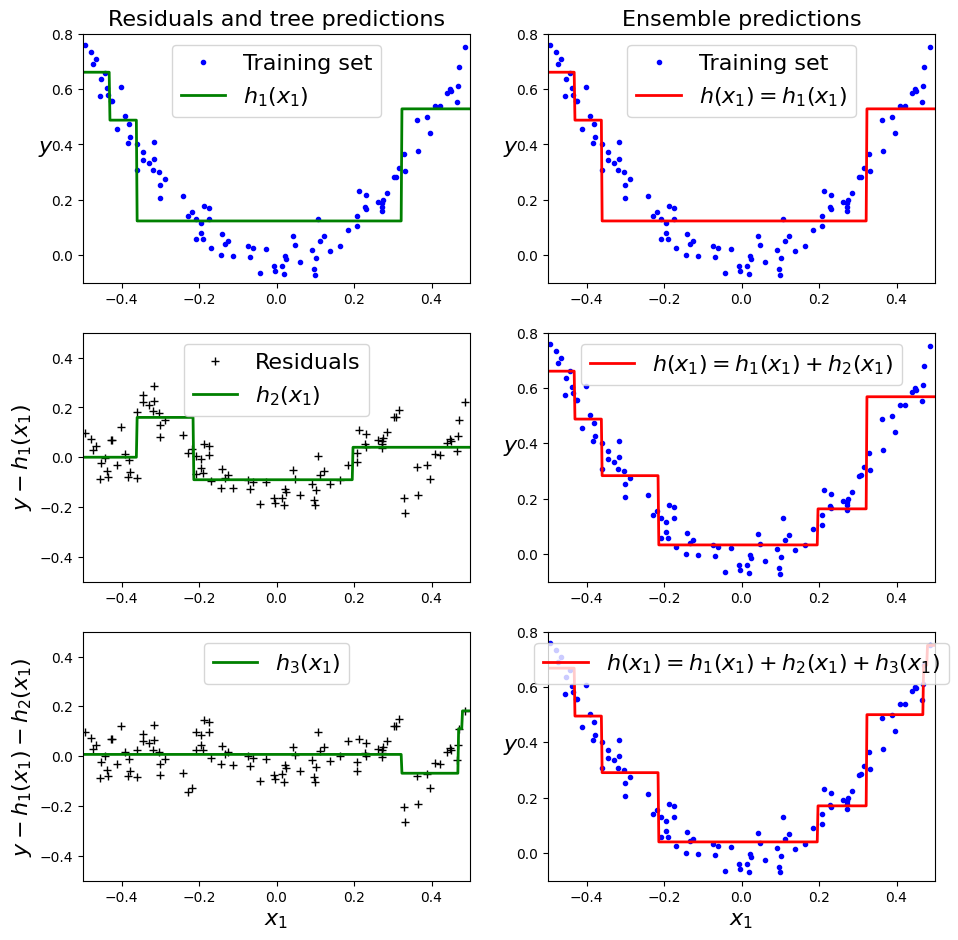

In [22]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

### 왜 gradient인가?

트리를 이용한 부스팅에서 step $t$까지 진행되었을 때 예측값은 다음으로 표현할 수 있다. (간단히 살펴보기 위해 일단 $\lambda=1$로 설정) 

$$ \hat y^{(t)}_i = \sum_{k=1}^{t} \hat f_k(x_i) = \hat y_{i}^{(t-1)} + \hat f_t(x_i) $$

회귀문제에서 손실 함수를

$$ \ell(y, \hat y) = \frac{1}{2} (y -  \hat y)^2   $$

라고 하자.

$\ell(y_i, \hat y^{(t)}_i)$를 근사하기 위해, loss function의 두번째 인자인 $\hat y$에 대해 $\hat y_{i}^{(t-1)}$ 에서 Taylor 1차 근사를 이용하겠다.

이를 위해, 다음을 먼저 계산한다.

$$ \left. \frac{\partial \ell(y_i, \hat y)}{\partial \hat y} \right|_{\hat y = \hat y_i^{(t-1)}} =  \left. \frac{1}{2} \frac{\partial (y -  \hat y)^2}{\partial \hat y} \right|_{\hat y = \hat y_i^{(t-1)}} = - (y_i - \hat  y^{(t-1)}_i)$$

즉, gradient boost regression 문제에서 사용했던 residual인 $y_i - \hat  y^{(t-1)}_i$는 loss function의 두번째 인자에 대해 $\hat y_{i}^{(t-1)}$ 에서 계산한 기울기의 음의 값이다.

또한,

$$ \ell(y_i, \hat y^{(t)}_i) =  \ell(y_i, \hat y^{(t-1)}_i + \hat f_t(x_i)) \approx \ell(y_i, \hat y^{(t-1)}_i) - (y_i - \hat  y^{(t-1)}_i)\hat f_t(x_i) $$

로 다시 쓸 수 있다.



* Greedy-algorithm 관점에서 보면, $\ell(y_i, \hat y^{(t)}_i)$를 줄여나가는 과정은 매 스텝에서 $(y_i - \hat  y^{(t-1)}_i)\hat f_t(x_i)$를 최대화하는 $\hat f_t(x_i)$를 찾는 과정이다. <br><br>

    * 이는 $\hat f_t(x_i)$를 residual인 $y_i - \hat  y^{(t-1)}_i$ 적합하는 것과 동일 <br><br>

* 또한, 매 스텝에서 residual을 점차 작게 만들려고 하는 것은 loss function의 기울기(gradient)를 점차 0으로 수렴하도록 하는 과정이다. <br><br>

* 이는 최적화 문제에서 음의 gradient 값을 점차 0으로 만들어 최적점을 찾아가는 steepest gradient descent 방법과 흡사하다. <br><br>

이 아이디어를 확장하면 편차 제곱 loss function 뿐만 아니라 임의의 loss function에 대해서도 gradient boosting 방법을 적용할 수 있다.

임의의 loss function $\ell(y, \hat y)$에 대해, $t$ step에서 weak-learner를 적합할 pseudo-residual은 각 데이터 $i$에 대해

$$ r_i = - \left. \frac{\partial \ell(y_i, \hat y)}{\partial \hat y} \right|_{\hat y = \hat y_i^{(t-1)}} $$

이다.

#### [```sklearn.ensemble.GradientBoostingRegressor```](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

Scikit-learn에서 제공하는 회귀 gradient boosting을 이용하여 보자.

- `max_dept` : default 3, 사용할 트리의 최대 깊이

- `n_estimators` : default=100, 부스팅 횟수

- `learning_rate` : 개별 트리의 기여도를 조정하는 것, 기본값은 0.1. 최적의 학습률은 `n_emstimators`에 따라 다름

위에서 생성한 데이터를 이용한 다음 예제를 살펴본다.

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

In [24]:
#list(gbrt.staged_predict(X_val))

In [25]:
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
#errors

In [26]:
# 최적의 부스팅 숫자
bst_n_estimators = np.argmin(errors) + 1
bst_n_estimators

56

In [27]:
# 최적의 부스팅 숫자로 다시 훈련
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=49)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=49)

In [28]:
min_error = np.min(errors)
min_error

0.002712853325235463

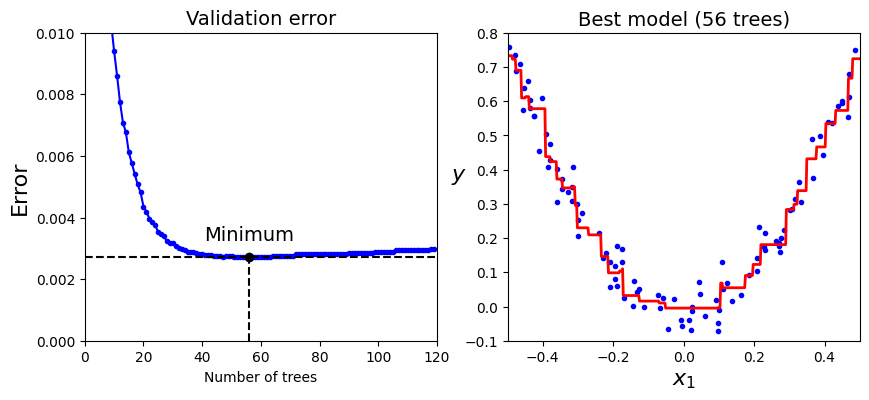

In [29]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

다른 랜덤값을 이용해 반복해 보기

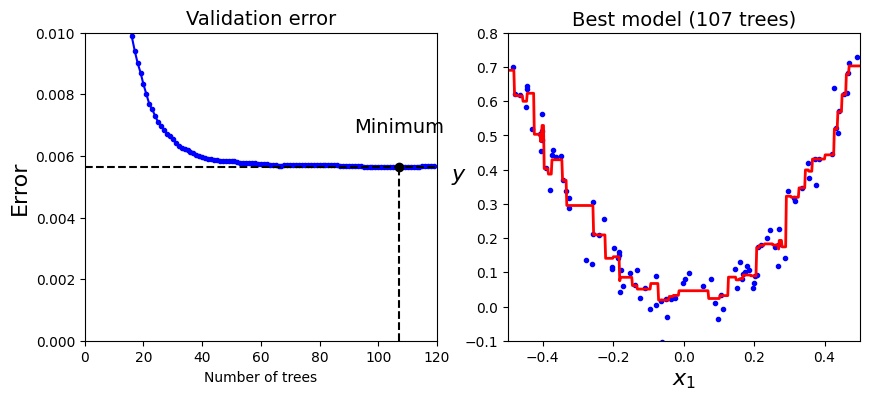

In [30]:
np.random.seed(None)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=49)
gbrt_best.fit(X_train, y_train)
min_error = np.min(errors)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

GradientBoostRegressor는 각 트리가 훈련할 때 사용할 훈련 샘플의 비율을 지정할 수 있다. 

```subsample``` 매개변수로 조정한다.

예를들어 ```subsample = 0.25```라면 각 트리는 무작위로 선택한 25%의 훈련샘플을 이용한다.

### 분류 문제 gradient boosting

분류 문제의 gradient boosting 또한 회귀 문제의 gradient boosting과 매우 흡사하다.

회귀 문제에서처럼 손실 함수를 정의하고, 손실 함수의 $\hat y_i$에서의 미분을 통해 그것의 음의 gradient(미분)를 계산한다.

<p> <font color=#00008B> &#9635 이진분류 문제 </font></p>

먼저 이진분류 문제를 생각해 보자.

만약 손실 함수를 binary cross entropy인 

$$ - y_i \log(\hat p_i) - (1 - y_i) \log(1 - \hat p_i)), \quad \hat p_i = \frac{1}{1 + e^{-\hat y_i}}$$

로 정의해 보자. Gradient 정의에 따라 계산 과정을 거치면 residual은 

$$ y_i - \hat p_i$$

으로 간단히 나타난다.

단, 이전에 설명한 것처럼 gradient boosting은 임의의 loss function에 대해 적용할 수 있으며, $\hat y$에 대한 음의 미분을 residual로 삼을 수 있다.

주의할 점은 분류 문제라고 할지라도 실제로 훈련되는 트리는 실수값으로 적합되는 regression tree이다. (residual이 실수값이므로)

따라서 예측의 과정에서는 아래의 sigmoid 함수를 이용하여 $\hat y_i$를 확률값으로 변환하고, 더 높은 확률을 가지는 클래스로 예측한다.

$$ \hat p_i = \frac{1}{1 + \exp(-\hat y_i)}, \quad 1- \hat p_i = \frac{\exp(-\hat y_i)}{1 + \exp(-\hat y_i)}$$

(즉, 이진 분류 문제의 경우  $\hat p_i > 0.5$이면 1번 클래스로 아니면 0번 클래스로 분류됨)

<p> <font color=#00008B> &#9635 다중 클래스 문제 </font></p>

Multi-class의 경우, sklearn에서는 각 단계에서 $K$개(class의 수)의 tree들을 생성한다.  

즉, 각 트리는 특정 $k$ 클래스에 속하는지 않는지를 판단하는 트리이며, 이 방식을 One-vs-Rest 전략이라고 한다.

* 각 클래스마다 하나의 이진 분류 문제를 만들어 해당 클래스에 속하는지 여부를 판단

예측의 단계에서 각 트리에서 계산된 값은 softmax 함수를 통하여 각 클래스에 속할 확률로 변환된다.

$$ \frac{e^{\hat y_k}}{\sum_{k=1}^K e^{\hat y_k}} $$

### 예제 : 이진 분류 문제

[`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)와 앞에서 사용한 `datasets.make_hastie_10_2`의 데이터를 이용한 예제를 이용하여 간단한 분류문제를 테스트해 보자.

In [31]:
from sklearn import datasets

X, y = datasets.make_hastie_10_2(n_samples=12_000)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=2_000, shuffle=False
)

In [32]:
y

array([-1.,  1.,  1., ..., -1.,  1., -1.])

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
n_estimators = 300
gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1).fit(X_train, y_train)

1과 -1의 두 클래스가 있다.

In [34]:
gb_clf.classes_

array([-1.,  1.])

In [35]:
gb_clf.score(X_test, y_test)

0.9535

In [36]:
import numpy as np
from sklearn.metrics import zero_one_loss

gb_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(gb_clf.staged_predict(X_test)):
    gb_err[i] = zero_one_loss(y_pred, y_test)

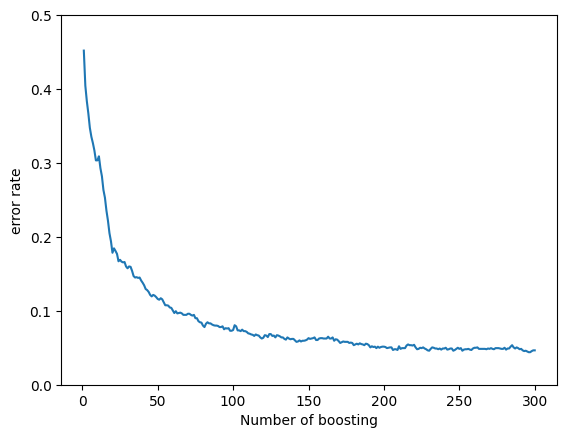

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(
    np.arange(n_estimators) + 1,
    gb_err,
    label="Gradient Boost Test Error")

ax.set_ylim((0.0, 0.5))
ax.set_xlabel("Number of boosting")
ax.set_ylabel("error rate")

plt.show()

[`.decision_function()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier.decision_function)으로 앙상블 트리로 예측된 값($\hat y$)을 살펴볼 수 있다.

만약 `decision_function()`의 값이 양수이면 해당 데이터 포인트는 클래스 1로 예측되고, 음수이면 클래스 -1로 예측된다.

`decision_function()`의 값의 절대 크기가 클수록 해당 데이터 포인트가 해당 클래스에 더 강하게 속한다고 예측된다.

In [38]:
ensemble_raw_prediction = gb_clf.decision_function(X_test[:1])
ensemble_raw_prediction

array([-5.832378])

[`staged_decision_function()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier.staged_decision_function)으로 각 스텝 별 prediction 값을 관찰할 수도 있다. 

In [39]:
i = 0
for raw_prediction in gb_clf.staged_decision_function(X_test[:1]):
    print(raw_prediction)
    i += 1
    if i == 10: break  # 편의상 10개까지 출력하였으나 그 이상도 관찰할 수 있음

[[-0.0934834]]
[[-0.19488346]]
[[-0.28922352]]
[[-0.35874163]]
[[-0.48014126]]
[[-0.5543168]]
[[-0.6404268]]
[[-0.76582703]]
[[-0.85287953]]
[[-0.97592121]]


`.decision_function()`의 값은 `.estimators_`에 있는 개별 트리의 예측값을 모두 합한 값과 같다.

단, 이진 분류 문제의 경우 아래 코드에서처럼 모델 `y_hat_t`의 초기값은 샘플을 통해 계산된 log odds ratio로 정한다.

$$ \log(\text{ratio of y belong to 1}) - \log(\text{ratio of y belong to -1}) $$

첫번째 test 샘플에 대해 계산해 본다.

In [40]:
y_hat_t = np.log(len(y_train[y_train == 1]) / len(y_train)) - np.log(len(y_train[y_train == -1]) / len(y_train))
# 혹은
y_hat_t = np.log(len(y_train[y_train == 1])) - np.log(len(y_train[y_train == -1]))

i = 0
for i in range(n_estimators):
    # y_hat_t을 단계별로 출력하여 staged_decition_function() 값과 비교해 볼 수 있음
    y_hat_t += gb_clf.estimators_[i][0].predict(X_test[0:1])   

y_hat_t

array([-5.832378])

In [41]:
# 앞서 계산한 decision function의 값과 일치
ensemble_raw_prediction

array([-5.832378])

`.decision_function()`의 값은 각 클래스에 속할 확률을 계산하는데 사용된다.

확률을 계산할 때는 sigmoid 함수를 이용한다.

$$ \frac{1}{1 + \exp(- \hat y)} $$

In [42]:
# +1 클래스에 속할 확률
1 / (1 + np.exp(- ensemble_raw_prediction))

array([0.00292253])

In [43]:
# -1 클래스에 속할 확률
np.exp(- ensemble_raw_prediction) / (1 + np.exp( - ensemble_raw_prediction))

array([0.99707747])

이것은 곧 `predict_proba()` 의 계산값이다.

In [44]:
gb_clf.predict_proba(X_test[:1])

array([[0.99707747, 0.00292253]])

더 큰 확률값이 나오는 클래스로 예측한다.

In [45]:
gb_clf.predict(X_test[:1])

array([-1.])

### 예제 : Iris 데이터 - multi class

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=0.1).fit(X_train, y_train)

In [48]:
gb_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [49]:
gb_clf.classes_

array([0, 1, 2])

Iris data set은 3개의 클래스가 있기 때문에 각 단계마다 3개의 작은 트리들이 있다.

In [50]:
gb_clf.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                             random_state=RandomState(MT19937) at 0x1EDC5FC9340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                             random_state=RandomState(MT19937) at 0x1EDC5FC9340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                             random_state=RandomState(MT19937) at 0x1EDC5FC9340)],
      dtype=object)

이전 예제와 마찬가지로 `decision_function`을 이용해 raw prediction 값을 살펴볼 수 있다.

In [51]:
ensemble_raw_prediction = gb_clf.decision_function(X_test[0:1])
ensemble_raw_prediction

array([[-1.95612941, -0.03976923, -1.91376011]])

Softmax 함수를 이용하여 위 값을 각 클래스에 속할 확률값으로 변환할 수 있다.

In [52]:
import numpy as np
np.exp(ensemble_raw_prediction[0,0])/np.sum(np.exp(ensemble_raw_prediction.ravel())), \
np.exp(ensemble_raw_prediction[0,1])/np.sum(np.exp(ensemble_raw_prediction.ravel())), \
np.exp(ensemble_raw_prediction[0,2])/np.sum(np.exp(ensemble_raw_prediction.ravel()))

(0.11312913043901776, 0.7688455451683387, 0.11802532439264357)

`predict_proba()`를 통해 얻는 확률값과 같다.

In [53]:
gb_clf.predict_proba(X_test[0:1])

array([[0.11312913, 0.76884555, 0.11802532]])

이전에 했던 것과 비슷하게 bootstrap 스텝 별로 예측값이 어떻게 계산되는지 살펴보자.

아래에서 `raw_prediction`은 3개의 트리에서의 $\hat y$값을 나타내고, $\hat y$가 가장 큰 위치가 예측 클래스 번호가 된다.

In [54]:
for raw_prediction in gb_clf.staged_decision_function(X_test[:1]):
    print("Raw score : ", raw_prediction)
    print("Probability :", np.exp(raw_prediction[0,:]) / np.sum(np.exp(raw_prediction)))

Raw score :  [[-1.19861229 -0.94774414 -1.1751855 ]]
Probability : [0.30222035 0.38839565 0.30938399]
Raw score :  [[-1.29411675 -0.79849766 -1.27144562]]
Probability : [0.27289268 0.4479572  0.27915013]
Raw score :  [[-1.38567474 -0.67032603 -1.35945413]]
Probability : [0.24561171 0.50225131 0.25213698]
Raw score :  [[-1.4739667  -0.55579886 -1.44046297]]
Probability : [0.22032408 0.55184511 0.22783081]
Raw score :  [[-1.55933183 -0.44956633 -1.52619838]]
Probability : [0.19734237 0.59866709 0.20399054]
Raw score :  [[-1.64230134 -0.35480219 -1.60933539]]
Probability : [0.17676501 0.64054564 0.18268935]
Raw score :  [[-1.72320629 -0.26750225 -1.69027721]]
Probability : [0.15820336 0.67829707 0.16349957]
Raw score :  [[-1.80230999 -0.18515402 -1.76934653]]
Probability : [0.14139767 0.71246603 0.1461363 ]
Raw score :  [[-1.87986095 -0.10769423 -1.83759371]]
Probability : [0.12615493 0.74224362 0.13160145]
Raw score :  [[-1.95612941 -0.03976923 -1.91376011]]
Probability : [0.11312913 0.7

Scikit-learn의 multi-class에 대한 gradient boost에서 모델의 초기값으로는 각 클래스 $k$에 대해 $\log(\mathbb P(Y=k))$에 대한 추정치, 즉, 샘플 비율을 사용한다.

* 훈련 샘플의 수 중 $k$ 클래스에 속하는 비율

* 각 스텝마다 트리가 총 클래스의 수, $K$개만큼 필요하므로, 초기값 또한 클래스 별로 $K$개 필요하다.

Binary 문제에서 log odds를 초기값으로 썼던 것과는 조금 다르나, 충분히 많은 estimator들을 사용할 경우 초기값은 크게 중요하지는 않다.

`.estimators_`는 리스트의 리스트로 구성되어 있다.

리스트의 첫번째 인덱스는 부트스트랩 단계를 나타내고, 두번째 인덱스는 각 스텝에서 등장하는 트리들의 번호(클래스 번호에 대응)이다.

아래 코드에서는 `estimators_`에 저장된 트리들을 이용하여 bootstrap 앙상블 결과를 재현한다.

트리 모형의 예측치들을 합산할 때, `gb_clf.learning_rate`을 곱해준다.

In [55]:
y_hat_t = np.zeros(len(gb_clf.classes_))

for i in range(len(gb_clf.classes_)):
    y_hat_t[i] = np.log(len(y_train[y_train == i]) / len(y_train)) 


for i in range(gb_clf.n_estimators_):

    tree_prediction = np.zeros(3)
    
    for j in range(3):
        
        tree_prediction[j] = gb_clf.estimators_[i][j].predict(X_test[:1])
                
    y_hat_t += gb_clf.learning_rate * tree_prediction
    
    print("Raw score by sum of tree predictions : ", y_hat_t)
    print("Probability by sum of tree predictions : ", np.exp(y_hat_t) / np.sum(np.exp(y_hat_t)))

Raw score by sum of tree predictions :  [-1.19861229 -0.94774414 -1.1751855 ]
Probability by sum of tree predictions :  [0.30222035 0.38839565 0.30938399]
Raw score by sum of tree predictions :  [-1.29411675 -0.79849766 -1.27144562]
Probability by sum of tree predictions :  [0.27289268 0.4479572  0.27915013]
Raw score by sum of tree predictions :  [-1.38567474 -0.67032603 -1.35945413]
Probability by sum of tree predictions :  [0.24561171 0.50225131 0.25213698]
Raw score by sum of tree predictions :  [-1.4739667  -0.55579886 -1.44046297]
Probability by sum of tree predictions :  [0.22032408 0.55184511 0.22783081]
Raw score by sum of tree predictions :  [-1.55933183 -0.44956633 -1.52619838]
Probability by sum of tree predictions :  [0.19734237 0.59866709 0.20399054]
Raw score by sum of tree predictions :  [-1.64230134 -0.35480219 -1.60933539]
Probability by sum of tree predictions :  [0.17676501 0.64054564 0.18268935]
Raw score by sum of tree predictions :  [-1.72320629 -0.26750225 -1.69